## Observations and Insights

## Dependencies and starter code

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_results = mouse_metadata.merge(study_results)

## Summary statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
summary_stats2 = summary_stats[['mean', 'std', '50%']]
summary_stats2['Variance'] = (summary_stats2['std'])**2
summary_stats2['SEM'] = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stats2 = summary_stats2.rename(columns={'mean':'Mean', 'std': 'Std Dev', '50%': 'Median'})
summary_stats2

/Users/effibatumi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/effibatumi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Mean,Std Dev,Median,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.322552,6.507770,50.854632,42.351070,0.512884
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


## Bar plots

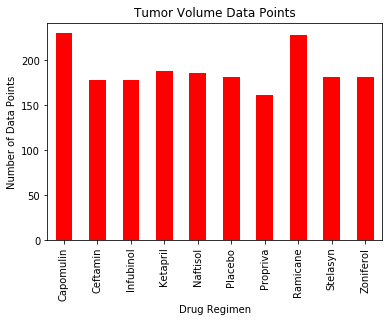

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_counts = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
#color = ['r', 'b', 'g', 'y', 'k', 'r', 'b', 'm', 'c', 'w']

summary_plot = grouped_counts.plot(kind='bar', color = 'r')
summary_plot.set_title("Tumor Volume Data Points")
summary_plot.set_ylabel("Number of Data Points")
plt.show()

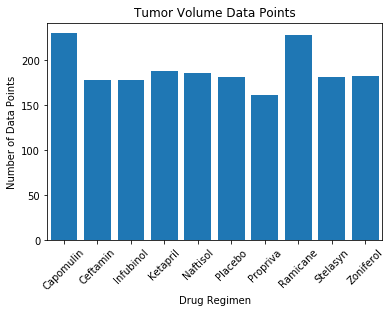

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(0,len(summary_stats))
xticks = [x for x in grouped_counts.keys()]
plt.bar(x_axis, grouped_counts)
plt.xlim(-0.5 ,x_axis.max() + 0.5)
plt.xticks(x_axis, xticks, rotation='45')
plt.title("Tumor Volume Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

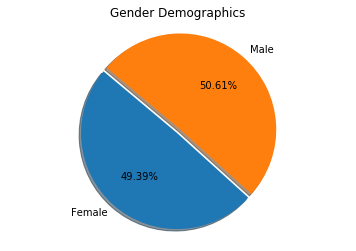

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_demo = mouse_results.groupby('Sex')['Sex'].count()
explode = (0.05,0)
labels = gender_demo.keys()
pie_plot = gender_demo.plot(kind='pie', explode= explode, shadow=True, 
                            labels = labels, autopct = "%1.2f%%", 
                            startangle = 140)
pie_plot.axis('equal')
pie_plot.set_title('Gender Demographics')
pie_plot.set_ylabel('')
#plt.axis('equal')
plt.show()

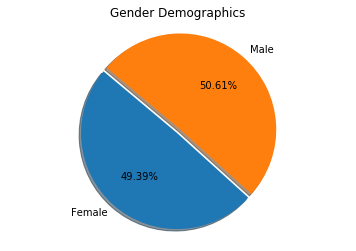

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_demo, explode= explode, shadow=True, 
        labels = labels, autopct = "%1.2f%%", startangle = 140)
plt.title('Gender Demographics')
plt.axis('equal')
plt.show()

## Quartiles, outliers and boxplots

In [140]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
grouped_regimen = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
grouped_regimen = grouped_regimen.sort_values('mean')
best_treatments = grouped_regimen.index[:4]
subset_results = mouse_results[mouse_results['Drug Regimen'].isin(best_treatments)]
mice_final_vol = subset_results[subset_results['Timepoint'] == 45]
mice_final_vol = mice_final_vol.reset_index(drop=True)
#print(mice_final_vol.head(4))

quartiles = mice_final_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq-lowerq

#print("------------------------------------------------------------------------")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)} mm3")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)} mm3")
print(f"The interquartile range of Tumor Volume is: {round(IQR,2)} mm3")
print(f"The median Tumor Volume is: {round(quartiles[0.5],2)} mm3")

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

outliers = len(mice_final_vol[mice_final_vol['Tumor Volume (mm3)'] < lower_bound]) + len(mice_final_vol[mice_final_vol['Tumor Volume (mm3)'] > upper_bound])

print(f"There are {outliers} outliers.")
#grouped_mice = mouse_results.groupby('MouseID')['Tumor Volume (mm3)'].sum()

The lower quartile of Tumor Volume is: 33.4 mm3
The upper quartile of Tumor Volume is: 61.43 mm3
The interquartile range of Tumor Volume is: 28.04 mm3
The median Tumor Volume is: 38.98 mm3
Values below -8.66 could be outliers.
Values above 103.49 could be outliers.
There are 0 outliers


Most promising treatments are:
Ramicane, Capomulin, Propriva, Ceftamin


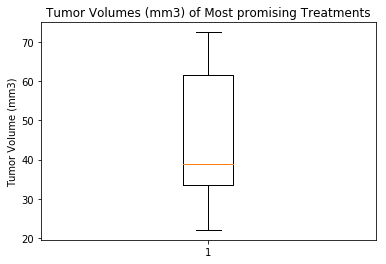

In [151]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes (mm3) of Most promising Treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(mice_final_vol['Tumor Volume (mm3)'])
print(f"Most promising treatments are:")
print(*best_treatments, sep=', ')
plt.show()

## Line and scatter plots

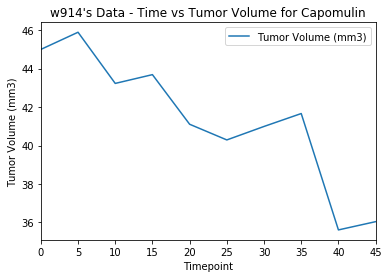

In [136]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
selected_drug = 'Capomulin'
mice_to_select = random.randrange(0,summary_stats.loc[selected_drug,'count'])
sample = mouse_results[mouse_results['Drug Regimen']== selected_drug]
sample = sample.reset_index(drop=True)
selected_mouse_id = sample.loc[mice_to_select, 'Mouse ID']
selected_mouse_data = sample[sample['Mouse ID']== selected_mouse_id]

plot_data = selected_mouse_data[['Tumor Volume (mm3)', 'Timepoint']]
plot_data = plot_data.set_index('Timepoint')
line_plot = plot_data.plot(kind='line')
line_plot.set_title(f"{selected_mouse_id}'s Data - Time vs Tumor Volume for {selected_drug}")
line_plot.set_ylabel('Tumor Volume (mm3)')
plt.show()

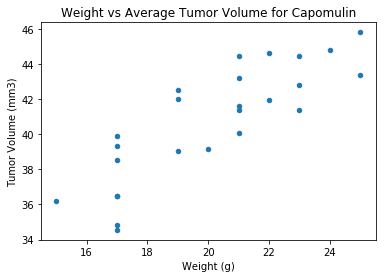

In [137]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
selected_drug = 'Capomulin'
summary_by_drug = mouse_results.groupby('Drug Regimen').mean()
dataset = mouse_results[mouse_results['Drug Regimen']== selected_drug]
grouped_dataset = dataset.groupby('Mouse ID').mean()
grouped_dataset = grouped_dataset[['Tumor Volume (mm3)', 'Weight (g)']]
#grouped_dataset = grouped_dataset.reset_index(drop=True)
grouped_dataset



scatter_plot = grouped_dataset.plot(kind='scatter', x = 'Weight (g)', y= 'Tumor Volume (mm3)')
scatter_plot.set_title(f"Weight vs Average Tumor Volume for {selected_drug}")
plt.show()

In [156]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mice_weight = grouped_dataset['Weight (g)']
avg_tumor_volume = grouped_dataset['Tumor Volume (mm3)']
correlation = st.pearsonr(mice_weight, avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mice_weight, avg_tumor_volume)
regress_values = mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

The correlation between both factors is 0.84
y = 0.95x + 21.55
